In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/movielens_100k/ml-100k/u.data', sep="\t", header=None)
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
item_freq = data["movieid"].value_counts()
print(item_freq)

50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: movie id, Length: 1682, dtype: int64


In [4]:
sum_rating = data.groupby(["movie id"]).sum()["rating"]
print(sum_rating)

movie id
1       1753
2        420
3        273
4        742
5        284
        ... 
1678       1
1679       3
1680       2
1681       3
1682       3
Name: rating, Length: 1682, dtype: int64


In [5]:
merger_check = pd.concat([item_freq, sum_rating], axis=1)
merger_check.columns = ["freq", "sum_rate"]

In [6]:
temp = merger_check[merger_check > 20]
print(temp["sum_rate"].div(temp["freq"]))

50      4.358491
258     3.803536
100     4.155512
181     4.007890
294     3.156701
          ...   
852          NaN
1505         NaN
1653         NaN
1452         NaN
1641         NaN
Length: 1682, dtype: float64


(array([611., 199., 129., 123.,  84.,  75.,  59.,  49.,  37.,  29.,  45.,
         23.,  22.,  20.,  29.,  17.,  12.,  13.,  17.,   8.,  10.,  11.,
          7.,   6.,   4.,  13.,   1.,   5.,   2.,   3.,   0.,   2.,   2.,
          3.,   0.,   2.,   2.,   0.,   1.,   0.,   1.,   2.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  12.64,  24.28,  35.92,  47.56,  59.2 ,  70.84,  82.48,
         94.12, 105.76, 117.4 , 129.04, 140.68, 152.32, 163.96, 175.6 ,
        187.24, 198.88, 210.52, 222.16, 233.8 , 245.44, 257.08, 268.72,
        280.36, 292.  , 303.64, 315.28, 326.92, 338.56, 350.2 , 361.84,
        373.48, 385.12, 396.76, 408.4 , 420.04, 431.68, 443.32, 454.96,
        466.6 , 478.24, 489.88, 501.52, 513.16, 524.8 , 536.44, 548.08,
        559.72, 571.36, 583.  ]),
 <BarContainer object of 50 artists>)

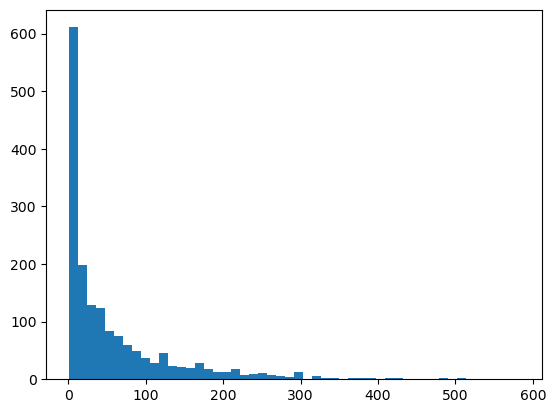

In [9]:
s = merger_check["freq"]
plt.hist(s, bins=50)

In [19]:
bound = np.percentile(s, 70)
merger_check["popular"] = merger_check["freq"] >= bound
merger_check["popular"] = merger_check["popular"].astype("int32")
merger_check["unpopular"] = merger_check["freq"] < bound
merger_check["unpopular"] = merger_check["unpopular"].astype("int32")
print(merger_check.tail())

      freq  sum_rate  popular  unpopular
852      1         1        0          1
1505     1         4        0          1
1653     1         5        0          1
1452     1         4        0          1
1641     1         3        0          1


In [21]:
print(merger_check["popular"].sum())

507


In [20]:
merger_check.to_csv("/home/phuong/Documents/expohedron/BPR/output/data_analysis.csv")